In [2]:
%pip install scipy

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [6]:
##import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
## Divide the dataset into independent and dependent features
x=dataset.iloc[:,3:13]#iloc is index location
y=dataset.iloc[:,13]

In [9]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
##Feature Engineering
geography=pd.get_dummies(x["Geography"],drop_first=True)#get_dummies is used for ohe geography values
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [11]:
x=x.drop(['Geography','Gender'],axis=1)

In [12]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
x=pd.concat([x,geography,gender],axis=1)

In [14]:
#splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
# The Fit method is used to compute the mean and std dev for a given feature to be used further for scaling
# The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
# The fit_transform() method does both fits and transform.
x_test=sc.transform(x_test)

In [16]:
x_train.shape

(8000, 11)

In [17]:
#Creating ANN

from tensorflow.keras.models import Sequential #to created the whole system
from tensorflow.keras.layers import Dense #to create layers and neurons
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU #Activation functions
from tensorflow.keras.layers import Dropout

In [18]:
classifier=Sequential()

In [19]:
#adding input layer
classifier.add(Dense(units=11,activation="relu"))

In [20]:
#adding first hidden layer
classifier.add(Dense(units=7,activation="relu"))

In [21]:
#adding second hidden layer
classifier.add(Dense(units=6,activation="relu"))

In [22]:
#Adding output layer
classifier.add(Dense(1,activation="sigmoid"))

In [23]:
classifier.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [25]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 [==============================] - 8s 10ms/step - loss: 0.5628 - accuracy: 0.7054 - val_loss: 0.4560 - val_accuracy: 0.7955
Epoch 2/10
536/536 [==============================] - 6s 12ms/step - loss: 0.4440 - accuracy: 0.7966 - val_loss: 0.4374 - val_accuracy: 0.7955
Epoch 3/10
536/536 [==============================] - 4s 7ms/step - loss: 0.4278 - accuracy: 0.8037 - val_loss: 0.4253 - val_accuracy: 0.8114
Epoch 4/10
536/536 [==============================] - 4s 8ms/step - loss: 0.4141 - accuracy: 0.8209 - val_loss: 0.4143 - val_accuracy: 0.8209
Epoch 5/10
536/536 [==============================] - 4s 7ms/step - loss: 0.4023 - accuracy: 0.8225 - val_loss: 0.4059 - val_accuracy: 0.8213
Epoch 6/10
536/536 [==============================] - 2s 4ms/step - loss: 0.3878 - accuracy: 0.8322 - val_loss: 0.3914 - val_accuracy: 0.8360
Epoch 7/10
536/536 [==============================] - 2s 4ms/step - loss: 0.3682 - accuracy: 0.8459 - val_loss: 0.3760 - val_accuracy: 0.8444
Epoc

In [31]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

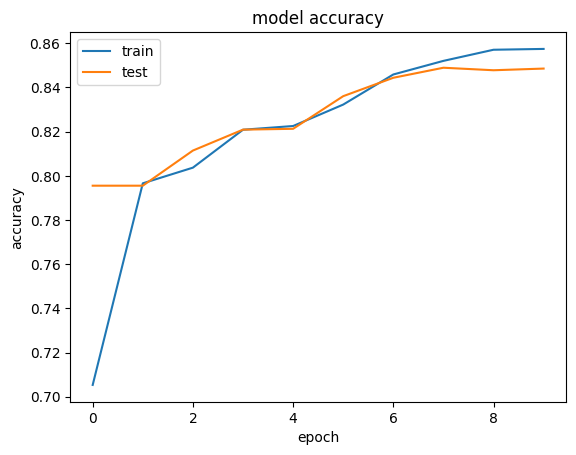

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [36]:
##get the weigths
classifier.get_weights()

[array([[ 0.14345737, -0.1816504 ,  0.19380741,  0.3183235 ,  0.06634709,
         -0.18253273, -0.10295323,  0.3386209 , -0.01203686, -0.01053574,
         -0.19482255],
        [-0.23803392, -0.2058892 , -0.0231828 ,  0.44418672, -0.8197853 ,
         -0.8821446 ,  0.237828  , -0.48329678,  0.12091675, -0.10638678,
         -0.35163233],
        [-0.41793272, -0.15380263,  0.15343782,  0.45987257, -0.11882856,
          0.01087334, -0.02126788,  0.17253236,  0.1345859 , -0.24988127,
         -0.32550418],
        [-0.43889955, -0.08670256, -0.44649276, -0.47751576,  0.33130422,
         -0.29395038, -0.62196267,  0.18122515, -0.1830467 ,  0.0388766 ,
         -0.3778982 ],
        [-0.00957445, -0.18640088, -0.5981275 , -0.10336227, -0.15947697,
          0.0419648 , -1.1143157 , -0.03769705, -0.10318843,  1.2313105 ,
         -0.10880345],
        [-0.3721405 ,  0.65318537,  0.09062548,  0.11134568, -0.22202797,
         -0.02827065, -0.07167825,  0.03018841,  0.03459665, -0.1312377